Exp 3 : H(Z) vs E
No Optimiser

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


Without Optimiser

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 683ms/step - accuracy: 0.5282 - loss: 204.5479 - val_accuracy: 0.7500 - val_loss: 11.7306
Epoch 2/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 617ms/step - accuracy: 0.6724 - loss: 32.9163 - val_accuracy: 0.7500 - val_loss: 3.4059
Epoch 3/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 870ms/step - accuracy: 0.7660 - loss: 8.3536 - val_accuracy: 0.5500 - val_loss: 16.7050
Epoch 4/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 603ms/step - accuracy: 0.7886 - loss: 5.4248 - val_accuracy: 0.8833 - val_loss: 1.6399
Epoch 5/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 653ms/step - accuracy: 0.9374 - loss: 1.7269 - val_accuracy: 0.8167 - val_loss: 2.9599
Epoch 6/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.9211 - loss: 1.6462 - val_accuracy: 0.8000 - val_loss: 3.0224
Epoch 7/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 691ms/step - accuracy: 0.9577 - loss: 0.2622 - val_accuracy: 0.7333 - val_loss: 4.2729
Epoch 8/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 666ms/step - accuracy: 0.9406 - loss: 0.5647 - val_accuracy: 0.9333 - val_los

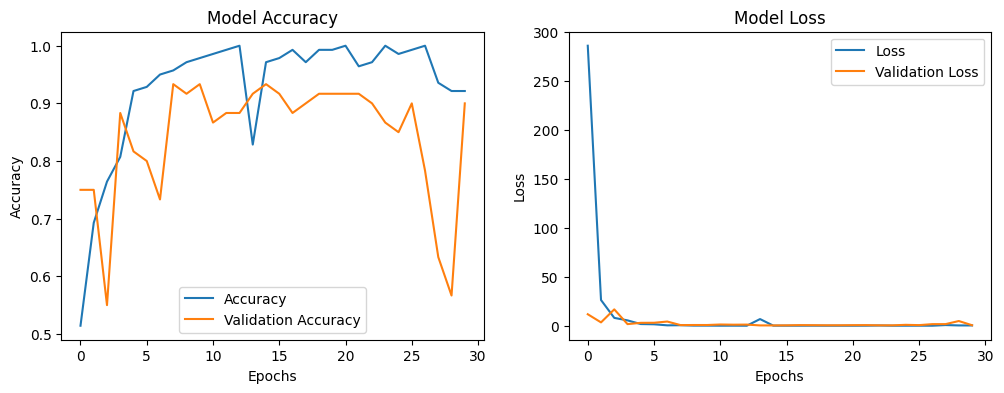

In [ ]:
# Import necessary libraries
import os
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix

# Function to load data from a directory
def load_data_from_directory(directory_path, label):
    data = []
    labels = []

    # Check if the directory exists
    if not os.path.exists(directory_path):
        print(f"Error: Directory {directory_path} not found.")
        return np.array([]), np.array([])

    # List all files in the directory
    files = [f for f in os.listdir(directory_path) if f.lower().endswith('.txt')]  # Only .txt files

    if len(files) == 0:
        print(f"No .txt files found in {directory_path}.")
        return np.array([]), np.array([])

    # Load data from each file
    for filename in files:
        file_path = os.path.join(directory_path, filename)
        try:
            file_data = np.loadtxt(file_path)
            data.append(file_data)
            labels.append(label)
        except Exception as e:
            print(f"Error loading {filename}: {e}")

    return np.array(data, dtype=np.float32), np.array(labels)

# Paths to your datasets
path_Z = '/content/drive/My Drive/PFA2_DataSet/DataSet/Healthy/Z'  # Z (Healthy)
path_N = '/content/drive/My Drive/PFA2_DataSet/DataSet/Elipy/N'  # N (Epileptic)

# Load data
data_Z, labels_Z = load_data_from_directory(path_Z, label=0)  # Z (label 0 - Healthy)
data_N, labels_N = load_data_from_directory(path_N, label=1)  # N (label 1 - Epileptic)

# Combine data and labels
if data_Z.size > 0 and data_N.size > 0:
    data_all = np.concatenate((data_Z, data_N), axis=0)
    labels_all = np.concatenate((labels_Z, labels_N), axis=0)

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(data_all, labels_all, test_size=0.3, random_state=42)

    # Define the CNN model for 1D input
    model = Sequential([
        Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
        MaxPooling1D(pool_size=2),
        Conv1D(128, kernel_size=3, activation='relu'),
        MaxPooling1D(pool_size=2),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')  # Binary classification (0 for Z, 1 for N)
    ])

    # Compile the model without specifying an optimizer
    model.compile(loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model
    history = model.fit(X_train[..., np.newaxis], y_train, epochs=30, batch_size=32, validation_data=(X_test[..., np.newaxis], y_test), verbose=1)

    # Evaluate the model
    y_pred = model.predict(X_test[..., np.newaxis])
    y_pred_classes = (y_pred > 0.5).astype("int32")  # Convert probabilities to class labels

    # Compute metrics
    accuracy = accuracy_score(y_test, y_pred_classes)
    recall = recall_score(y_test, y_pred_classes)  # Sensitivity
    precision = precision_score(y_test, y_pred_classes)
    conf_matrix = confusion_matrix(y_test, y_pred_classes)

    # Specificity calculation
    tn, fp, fn, tp = conf_matrix.ravel()
    specificity = tn / (tn + fp)

    # Print metrics
    print("\nFinal Evaluation Metrics:")
    print("Test Accuracy: ", accuracy)
    print("Test Recall (Sensitivity): ", recall)
    print("Test Precision: ", precision)
    print("Test Specificity: ", specificity)
    print("Confusion Matrix: \n", conf_matrix)

    # Plot Training History
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

else:
    print("Error: Data loading failed. Ensure the files are present in the directories.")


With Standerscaler

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 688ms/step - accuracy: 0.4954 - loss: 6.7928 - val_accuracy: 0.5167 - val_loss: 0.6597
Epoch 2/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.6353 - loss: 0.6721 - val_accuracy: 0.9167 - val_loss: 0.4716
Epoch 3/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 613ms/step - accuracy: 0.7257 - loss: 0.5498 - val_accuracy: 0.6333 - val_loss: 0.5531
Epoch 4/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 587ms/step - accuracy: 0.7953 - loss: 0.4483 - val_accuracy: 0.9000 - val_loss: 0.3317
Epoch 5/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 816ms/step - accuracy: 0.9478 - loss: 0.2407 - val_accuracy: 0.6333 - val_loss: 0.7103
Epoch 6/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 695ms/step - accuracy: 0.7211 - loss: 0.7162 - val_accuracy: 0.8000 - val_loss: 0.4642
Epoch 7/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 600ms/step - accuracy: 0.9406 - loss: 0.2025 - val_accuracy: 0.8667 - val_loss: 0.2984
Epoch 8/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 779ms/step - accuracy: 0.9751 - loss: 0.1330 - val_accuracy: 0.9000 - val_loss: 0.

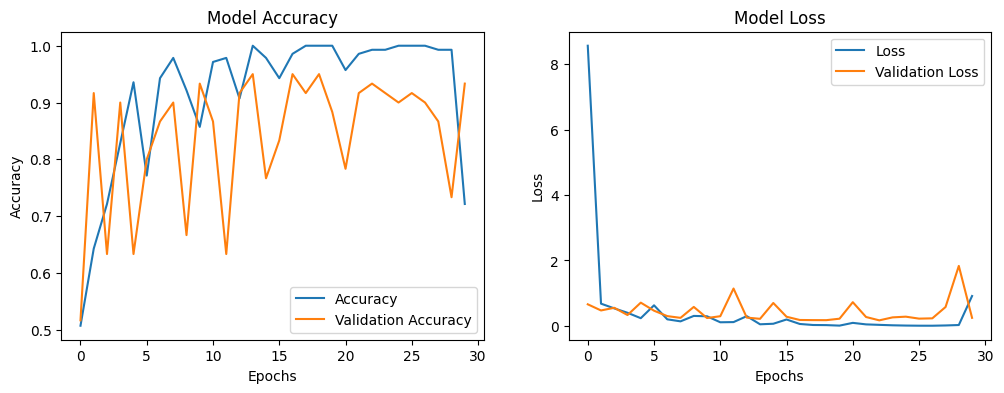

In [3]:
# Import necessary libraries
import os
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from sklearn.preprocessing import StandardScaler  # Import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix

# Function to load data from a directory
def load_data_from_directory(directory_path, label):
    data = []
    labels = []

    # Check if the directory exists
    if not os.path.exists(directory_path):
        print(f"Error: Directory {directory_path} not found.")
        return np.array([]), np.array([])

    # List all files in the directory
    files = [f for f in os.listdir(directory_path) if f.lower().endswith('.txt')]  # Only .txt files

    if len(files) == 0:
        print(f"No .txt files found in {directory_path}.")
        return np.array([]), np.array([])

    # Load data from each file
    for filename in files:
        file_path = os.path.join(directory_path, filename)
        try:
            file_data = np.loadtxt(file_path)
            data.append(file_data)
            labels.append(label)
        except Exception as e:
            print(f"Error loading {filename}: {e}")

    return np.array(data, dtype=np.float32), np.array(labels)

# Paths to your datasets
path_Z = '/content/drive/My Drive/PFA2_DataSet/DataSet/Healthy/Z'  # Z (Healthy)
path_N = '/content/drive/My Drive/PFA2_DataSet/DataSet/Elipy/N'  # N (Epileptic)

# Load data
data_Z, labels_Z = load_data_from_directory(path_Z, label=0)  # Z (label 0 - Healthy)
data_N, labels_N = load_data_from_directory(path_N, label=1)  # N (label 1 - Epileptic)

# Combine data and labels
if data_Z.size > 0 and data_N.size > 0:
    data_all = np.concatenate((data_Z, data_N), axis=0)
    labels_all = np.concatenate((labels_Z, labels_N), axis=0)

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(data_all, labels_all, test_size=0.3, random_state=42)

    # Standardize the data (standardization step added)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Reshape the data to be compatible with Conv1D (Adding an extra dimension)
    X_train = X_train[..., np.newaxis]
    X_test = X_test[..., np.newaxis]

    # Define the CNN model for 1D input
    model = Sequential([
        Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
        MaxPooling1D(pool_size=2),
        Conv1D(128, kernel_size=3, activation='relu'),
        MaxPooling1D(pool_size=2),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')  # Binary classification (0 for Z, 1 for N)
    ])

    # Compile the model without specifying an optimizer
    model.compile(loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model
    history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test), verbose=1)

    # Evaluate the model
    y_pred = model.predict(X_test)
    y_pred_classes = (y_pred > 0.5).astype("int32")  # Convert probabilities to class labels

    # Compute metrics
    accuracy = accuracy_score(y_test, y_pred_classes)
    recall = recall_score(y_test, y_pred_classes)  # Sensitivity
    precision = precision_score(y_test, y_pred_classes)
    conf_matrix = confusion_matrix(y_test, y_pred_classes)

    # Specificity calculation
    tn, fp, fn, tp = conf_matrix.ravel()
    specificity = tn / (tn + fp)

    # Print metrics
    print("\nFinal Evaluation Metrics:")
    print("Test Accuracy: ", accuracy)
    print("Test Recall (Sensitivity): ", recall)
    print("Test Precision: ", precision)
    print("Test Specificity: ", specificity)
    print("Confusion Matrix: \n", conf_matrix)

    # Plot Training History
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

else:
    print("Error: Data loading failed. Ensure the files are present in the directories.")


With Optimiser

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 811ms/step - accuracy: 0.4755 - loss: 221.3622 - val_accuracy: 0.5167 - val_loss: 63.0459
Epoch 2/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 621ms/step - accuracy: 0.5323 - loss: 66.2978 - val_accuracy: 0.5000 - val_loss: 18.3889
Epoch 3/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 621ms/step - accuracy: 0.6919 - loss: 12.5140 - val_accuracy: 0.5667 - val_loss: 8.0084
Epoch 4/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.6440 - loss: 5.9293 - val_accuracy: 0.7167 - val_loss: 1.2856
Epoch 5/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 819ms/step - accuracy: 0.7936 - loss: 0.9532 - val_accuracy: 0.8333 - val_loss: 0.9760
Epoch 6/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.8762 - loss: 0.3196 - val_accuracy: 0.9167 - val_loss: 0.4724
Epoch 7/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 775ms/step - accuracy: 0.9211 - loss: 0.1826 - val_accuracy: 0.9167 - val_loss: 0.3838
Epoch 8/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.9579 - loss: 0.1915 - val_accuracy: 0.8500 - val_loss: 0.

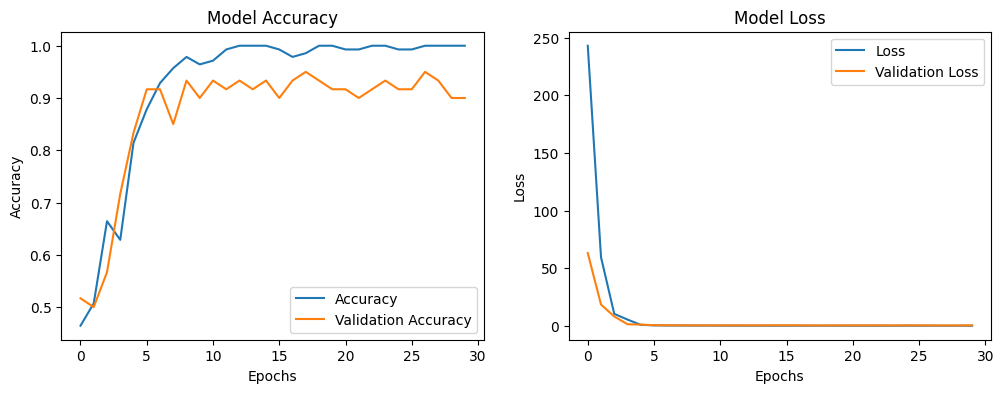

In [ ]:
# Import necessary libraries
import os
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix

# Function to load data from a directory
def load_data_from_directory(directory_path, label):
    data = []
    labels = []

    # Check if the directory exists
    if not os.path.exists(directory_path):
        print(f"Error: Directory {directory_path} not found.")
        return np.array([]), np.array([])

    # List all files in the directory
    files = [f for f in os.listdir(directory_path) if f.lower().endswith('.txt')]  # Only .txt files

    if len(files) == 0:
        print(f"No .txt files found in {directory_path}.")
        return np.array([]), np.array([])

    # Load data from each file
    for filename in files:
        file_path = os.path.join(directory_path, filename)
        try:
            file_data = np.loadtxt(file_path)
            data.append(file_data)
            labels.append(label)
        except Exception as e:
            print(f"Error loading {filename}: {e}")

    return np.array(data, dtype=np.float32), np.array(labels)

# Paths to your datasets
path_Z = '/content/drive/My Drive/PFA2_DataSet/DataSet/Healthy/Z'  # Z (Healthy)
path_N = '/content/drive/My Drive/PFA2_DataSet/DataSet/Elipy/N'  # N (Epileptic)

# Load data
data_Z, labels_Z = load_data_from_directory(path_Z, label=0)  # Z (label 0 - Healthy)
data_N, labels_N = load_data_from_directory(path_N, label=1)  # N (label 1 - Epileptic)

# Combine data and labels
if data_Z.size > 0 and data_N.size > 0:
    data_all = np.concatenate((data_Z, data_N), axis=0)
    labels_all = np.concatenate((labels_Z, labels_N), axis=0)

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(data_all, labels_all, test_size=0.3, random_state=42)

    # Define the CNN model for 1D input
    model = Sequential([
        Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
        MaxPooling1D(pool_size=2),
        Conv1D(128, kernel_size=3, activation='relu'),
        MaxPooling1D(pool_size=2),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')  # Binary classification (0 for Z, 1 for N)
    ])

    # Compile the model with the Adam optimizer
    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model
    history = model.fit(X_train[..., np.newaxis], y_train, epochs=30, batch_size=32, validation_data=(X_test[..., np.newaxis], y_test), verbose=1)

    # Evaluate the model
    y_pred = model.predict(X_test[..., np.newaxis])
    y_pred_classes = (y_pred > 0.5).astype("int32")  # Convert probabilities to class labels

    # Compute metrics
    accuracy = accuracy_score(y_test, y_pred_classes)
    recall = recall_score(y_test, y_pred_classes)  # Sensitivity
    precision = precision_score(y_test, y_pred_classes)
    conf_matrix = confusion_matrix(y_test, y_pred_classes)

    # Specificity calculation
    tn, fp, fn, tp = conf_matrix.ravel()
    specificity = tn / (tn + fp)

    # Print metrics
    print("\nFinal Evaluation Metrics:")
    print("Test Accuracy: ", accuracy)
    print("Test Recall (Sensitivity): ", recall)
    print("Test Precision: ", precision)
    print("Test Specificity: ", specificity)
    print("Confusion Matrix: \n", conf_matrix)

    # Plot Training History
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

else:
    print("Error: Data loading failed. Ensure the files are present in the directories.")


with both op and standarisation

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 8s 850ms/step - accuracy: 0.4909 - loss: 0.9391 - val_accuracy: 0.9500 - val_loss: 0.5647
Epoch 2/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 413ms/step - accuracy: 0.6741 - loss: 0.5709 - val_accuracy: 0.4833 - val_loss: 0.4842
Epoch 3/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 231ms/step - accuracy: 0.5805 - loss: 0.4471 - val_accuracy: 0.5333 - val_loss: 0.4472
Epoch 4/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 188ms/step - accuracy: 0.7742 - loss: 0.4059 - val_accuracy: 1.0000 - val_loss: 0.3531
Epoch 5/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 190ms/step - accuracy: 0.9581 - loss: 0.3480 - val_accuracy: 0.9333 - val_loss: 0.2610
Epoch 6/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 192ms/step - accuracy: 0.9590 - loss: 0.2341 - val_accuracy: 0.9333 - val_loss: 0.1167
Epoch 7/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 192ms/step - accuracy: 0.9553 - loss: 0.1199 - val_accuracy: 0.9833 - val_loss: 0.0612
Epoch 8/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 266ms/step - accuracy: 0.9549 - loss: 0.0620 - val_accuracy: 0.9833 - val_loss:

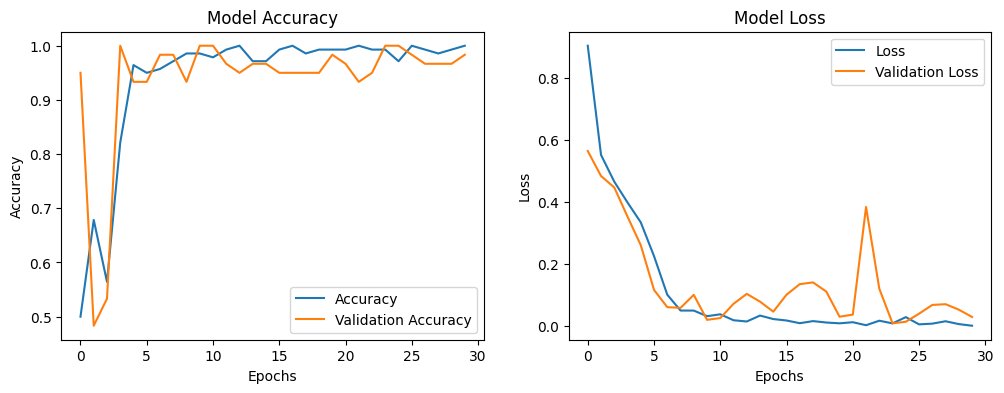

In [5]:
from google.colab import drive
drive.mount('/content/drive')

# Import necessary libraries
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix

# Function to load data from a directory
def load_data_from_directory(directory_path, label):
    data = []
    labels = []

    # Check if the directory exists
    if not os.path.exists(directory_path):
        print(f"Error: Directory {directory_path} not found.")
        return np.array([]), np.array([])

    # List all files in the directory
    files = [f for f in os.listdir(directory_path) if f.lower().endswith('.txt')]  # Only .txt files

    if len(files) == 0:
        print(f"No .txt files found in {directory_path}.")
        return np.array([]), np.array([])

    # Load data from each file
    for filename in files:
        file_path = os.path.join(directory_path, filename)
        try:
            file_data = np.loadtxt(file_path)
            data.append(file_data)
            labels.append(label)
        except Exception as e:
            print(f"Error loading {filename}: {e}")

    return np.array(data, dtype=np.float32), np.array(labels)

# Paths to your datasets
path_E = '/content/drive/My Drive/PFA2_DataSet/DataSet/Elipy/N'  # Elipy (E)
path_S = '/content/drive/My Drive/PFA2_DataSet/DataSet/Seizeur/S'  # Seizeur (S)

# Load data
data_E, labels_E = load_data_from_directory(path_E, label=0)  # Elipy (label 0)
data_S, labels_S = load_data_from_directory(path_S, label=1)  # Seizure (label 1)

# Combine data and labels
if data_E.size > 0 and data_S.size > 0:
    data_all = np.concatenate((data_E, data_S), axis=0)
    labels_all = np.concatenate((labels_E, labels_S), axis=0)

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(data_all, labels_all, test_size=0.3, random_state=42)

    # Normalize data using StandardScaler
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Reshape data for the CNN model (add an extra dimension for channels)
    X_train = X_train[..., np.newaxis]
    X_test = X_test[..., np.newaxis]

    # Define the CNN model for 1D input
    model = Sequential([
        Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
        MaxPooling1D(pool_size=2),
        Conv1D(64, kernel_size=3, activation='relu'),
        MaxPooling1D(pool_size=2),
        Flatten(),
        Dense(64, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')  # Binary classification (0 for E, 1 for S)
    ])

    # Compile the model with the Adam optimizer
    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model (reduced epochs for faster execution)
    history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test), verbose=1)

    # Evaluate the model
    y_pred = model.predict(X_test)
    y_pred_classes = (y_pred > 0.5).astype("int32")  # Convert probabilities to class labels

    # Compute metrics
    accuracy = accuracy_score(y_test, y_pred_classes)
    recall = recall_score(y_test, y_pred_classes)  # Sensitivity
    precision = precision_score(y_test, y_pred_classes)
    conf_matrix = confusion_matrix(y_test, y_pred_classes)

    # Specificity calculation
    tn, fp, fn, tp = conf_matrix.ravel()
    specificity = tn / (tn + fp)

    # Print metrics
    print("\nFinal Evaluation Metrics:")
    print("Test Accuracy: ", accuracy)
    print("Test Recall (Sensitivity): ", recall)
    print("Test Precision: ", precision)
    print("Test Specificity: ", specificity)
    print("Confusion Matrix: \n", conf_matrix)

    # Plot Training History
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

else:
    print("Error: Data loading failed. Ensure the files are present in the directories.")
